In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

df=pd.read_excel('http://www.elisanet.fi/taanila/logr1.xlsx')
df.head()

,Obs No.,Buy,Income,Is Female,Is Married
0,1,0,24000,1,0
1,2,1,75000,1,1
2,3,0,46000,1,1
3,4,1,70000,0,1
4,5,0,43000,1,0


In [2]:
#X=feature, y=target
X=df[['Income','Is Female','Is Married']]
y=df['Buy']

In [3]:
#Valitse malli ja sovita (fit) malli
malli=LogisticRegression()
malli.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
#Ennusta (predict) mallia käyttäen
ennuste=malli.predict(X)
df['Forecast']=ennuste
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Forecast
0,1,0,24000,1,0,0
1,2,1,75000,1,1,1
2,3,0,46000,1,1,0
3,4,1,70000,0,1,1
4,5,0,43000,1,0,0


In [5]:
#Mallin laskemat todennäköisyydet ostamiselle
todnak=malli.predict_proba(X)
df['Probability']=todnak[:,1]
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Forecast,Probability
0,1,0,24000,1,0,0,0.097165
1,2,1,75000,1,1,1,0.573461
2,3,0,46000,1,1,0,0.265251
3,4,1,70000,0,1,1,0.619631
4,5,0,43000,1,0,0,0.202994


In [6]:
#Mallin selityskerroin
malli.score(X, y)

0.9227340267459139

In [7]:
print(classification_report(y, ennuste))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       548
          1       0.82      0.75      0.78       125

avg / total       0.92      0.92      0.92       673



Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

The F-measure (F_\beta and F_1 measures) can be interpreted as a weighted harmonic mean of the precision and recall. A F_\beta measure reaches its best value at 1 and its worst score at 0. With \beta = 1,  F_\beta and F_1 are equivalent, and the recall and the precision are equally important.

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, ennuste)

array([[527,  21],
       [ 31,  94]], dtype=int64)

Buy 0 tapauksista (548) 21 ennustettiin Buy 1 tapauksiksi
Buy 1 tapauksista (125) 31 ennustettiin Buy 0 tapauksiksi

In [9]:
pd.crosstab(df['Is Female'],df['Buy']).plot(kind='bar')

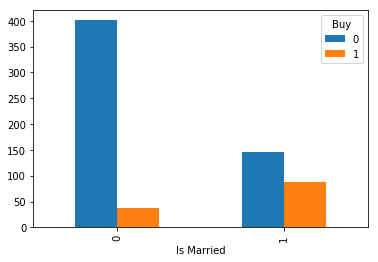

In [10]:
pd.crosstab(df['Is Married'],df['Buy']).plot(kind='bar')

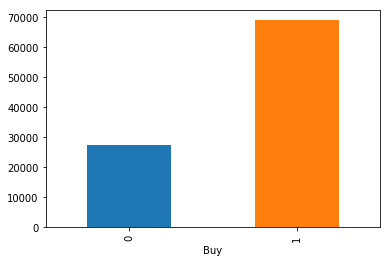

In [11]:
df['Income'].groupby(df['Buy']).mean().plot(kind='bar')